# <center>**Análise Exploratória**</center>

Nesta fase do projeto, conduziremos uma análise exploratória dos dados, buscando identificar relações entre as variáveis, aprofundar nosso entendimento sobre a base de dados e extrair possíveis insights. Ao concluir este arquivo, teremos dois dataframes prontos para modelagem preditiva em R. Esta etapa é fortemente visual e rica em estatísticas descritivas.

### **Bibliotecas e Configurações Gerais**

Todas as bibliotecas utilizadas no projeto e os ajustes gerais de configuração

In [1]:
# Importando Bibliotecas
# Manipulação de dados 
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Matematica
import math
from scipy.stats import mode, skew

Para facilitar a visualização das colunas dos dataframes, será altarada as configurações de display conforme o código abaixo.

In [2]:
# Configuração de visualização
# Definindo o valor máximo de colunas a serem exibidas como None
pd.set_option("display.max_columns", None)

In [3]:
# Incializado no modo offline
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

### **Importando Bases de dados**

Importando as bases de dados resultantes da etapa de pré-processamento. Para evitar manipulações diretas nessas bases, criaremos cópias denominadas como df_rent e df_sale.

In [4]:
# Importando e criando cópia
# df_rent
df_main_rent = pd.read_csv("../data/df_main_rent.csv")
df_main_rent = df_main_rent.drop(columns="Unnamed: 0")

df_rent = df_main_rent.copy()

df_rent

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Latitude,Longitude
0,930,220.0,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,-23.543138,-46.479486
1,1000,148.0,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,-23.550239,-46.480718
2,1000,100.0,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,-23.542818,-46.485665
3,1000,200.0,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,-23.547171,-46.483014
4,1300,410.0,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7014,3700,595.0,73,1,2,1,1,0,0,1,0,Brooklin/São Paulo,-23.617682,-46.694963
7015,21000,3000.0,208,4,4,3,3,1,1,1,0,Brooklin/São Paulo,-23.606891,-46.695934
7016,3800,710.0,55,1,1,0,1,0,1,1,0,Brooklin/São Paulo,-23.612672,-46.685210
7017,5000,2354.0,205,3,2,1,2,1,0,0,0,Brooklin/São Paulo,-23.612287,-46.681482


In [5]:
# Importando e criando cópia
# df_sale
df_main_sale = pd.read_csv("../data/df_main_sale.csv")
df_main_sale = df_main_sale.drop(columns="Unnamed: 0")

df_sale = df_main_sale.copy()

df_sale

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Latitude,Longitude
0,732600,1000.000000,74,1,2,1,2,1,0,1,0,Vila Madalena/São Paulo,-23.552129,-46.692244
1,1990000,2400.000000,164,4,5,2,3,1,1,1,0,Vila Madalena/São Paulo,-23.551613,-46.699106
2,720000,700.000000,70,2,2,1,1,1,0,1,1,Vila Madalena/São Paulo,-23.547687,-46.692594
3,1680000,1580.000000,155,3,5,3,2,1,0,1,0,Vila Madalena/São Paulo,-23.552590,-46.691104
4,1200000,900.000000,56,2,2,1,2,0,1,1,0,Vila Madalena/São Paulo,-23.553087,-46.697890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,265000,420.000000,51,2,1,0,1,0,0,0,0,Jabaquara/São Paulo,-23.653004,-46.635463
6298,545000,630.000000,74,3,2,1,2,0,0,1,0,Jabaquara/São Paulo,-23.648930,-46.641982
6299,515000,1100.000000,114,3,3,1,1,0,0,1,0,Jabaquara/São Paulo,-23.649693,-46.649783
6300,345000,48.000000,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,-23.652060,-46.637046


Assim, temos as duas bases de dados importadas para o ambiente do jupyter notebook.

### **Formato das Preditoras e Ajustes de Proporcionalidade**

Antes de prosseguirmos com as análises exploratórias, é essencial determinar a "natureza" de cada variável presente no dataframe. De imediato, reconhecemos que as colunas price, size e condo são variáveis quantitativas contínuas. As colunas restantes passarão por uma revisão para identificarmos os tipos de variáveis com os quais estamos lidando.

Primeiramente será criada uma função que retorna uma tabela com a contagem de valores de uma coluna:

In [6]:
# Criando função que retorna tabela de comparação
def table_compar_count(df1, df2, variavel):
    # Criando filtro
    df_part1 = df1[variavel].value_counts().sort_index().to_frame(name="Rent")
    df_part2 = df2[variavel].value_counts().sort_index().to_frame(name="Sale")

    # Concatenando os dois dataframes
    df_final = pd.concat([df_part1, df_part2], axis=1)

    return df_final

Aplicando esta função nas variaveis quantitativas discretas:

In [7]:
# Para Variavel Rooms
print("Variavel Rooms:")
table_compar_count(df_rent, df_sale, variavel="Rooms")

Variavel Rooms:


,Rent,Sale
Rooms,,
1,1099,575.0
2,3179,3433.0
3,2245,1974.0
4,479,312.0
5,13,7.0
6,2,1.0
7,1,NaN
10,1,NaN


In [8]:
# Para variavel toilets
print("Variavel Toilets:")
table_compar_count(df_rent, df_sale, variavel="Toilets")

Variavel Toilets:


,Rent,Sale
Toilets,,
1,1609,1472.0
2,4140,3858.0
3,484,450.0
4,492,315.0
5,246,172.0
6,39,28.0
7,7,7.0
8,2,NaN


In [9]:
# Para variavel Suits
print("Variavel Suits:")
table_compar_count(df_rent, df_sale, variavel="Suites")

Variavel Suits:


,Rent,Sale
Suites,,
0,1649.0,1531.0
1,4343.0,4129.0
2,350.0,253.0
3,514.0,300.0
4,159.0,88.0
5,4.0,NaN
6,NaN,1.0


In [10]:
# Para variavel Parking
print("Variavel Parking:")
table_compar_count(df_rent, df_sale, variavel="Parking")

Variavel Parking:


,Rent,Sale
Parking,,
0,288,268.0
1,4370,4274.0
2,1580,1358.0
3,505,239.0
4,210,136.0
5,49,23.0
6,11,3.0
7,3,1.0
8,2,NaN



Ao examinar as variáveis em questão, identificamos que todas são quantitativas discretas, referentes ao número de quartos, banheiros, suítes e vagas de garagem. Constatamos que, conforme estes números aumentam, o volume de observações diminui. Em determinadas situações, encontramos apenas uma ou até mesmo nenhuma observação. Por exemplo, dentre os apartamentos disponíveis para aluguel, apenas um possui 7 quartos. Esta distribuição pode gerar desafios na fase de modelagem. Portanto, optamos por reagrupar essas variáveis, consolidando aquelas com uma contagem de observações significativamente baixa, seguindo critérios descritos abaixo:

- `Rooms`: (1, 2, 3, 4+) quartos
- `Toilets`: (1, 2, 3, 4, 5+) banheiros
- `Suits` : (1, 2, 3, 4+) suites
- `Parking`: (1, 2, 3, 4+) vagas de garagem


Portanto, o último valor agora indica esse número ou um valor superior. Por exemplo, para a variável "toilets", o valor 5+ representa "5 banheiros ou mais".

In [11]:
# Reajustando variável rooms
# Para rent
df_rent.loc[df_rent["Rooms"] >= 4, "Rooms"] = 4
# Para Sales
df_sale.loc[df_sale["Rooms"] >= 4, "Rooms"] = 4

# Visualizando Mudanças
table_compar_count(df_rent, df_sale, variavel="Rooms")

,Rent,Sale
Rooms,,
1,1099,575
2,3179,3433
3,2245,1974
4,496,320


In [12]:
# Reajustando variável toilets
# Para rent
df_rent.loc[df_rent["Toilets"] >= 5, "Toilets"] = 5
# Para Sales
df_sale.loc[df_sale["Toilets"] >= 5, "Toilets"] = 5

# Visualizando Mudanças
table_compar_count(df_rent, df_sale, variavel="Toilets")

,Rent,Sale
Toilets,,
1,1609,1472
2,4140,3858
3,484,450
4,492,315
5,294,207


In [13]:
# Reajustando variável Suits
# Para rent
df_rent.loc[df_rent["Suites"] >= 4, "Suites"] = 4
# Para Sales
df_sale.loc[df_sale["Suites"] >= 4, "Suites"] = 4

# Visualizando Mudanças
table_compar_count(df_rent, df_sale, variavel="Suites")

,Rent,Sale
Suites,,
0,1649,1531
1,4343,4129
2,350,253
3,514,300
4,163,89


In [14]:
# Reajustando variável Parking
# Para rent
df_rent.loc[df_rent["Parking"] >= 4, "Parking"] = 4
# Para Sales
df_sale.loc[df_sale["Parking"] >= 4, "Parking"] = 4

# Visualizando Mudanças
table_compar_count(df_rent, df_sale, variavel="Parking")

,Rent,Sale
Parking,,
0,288,268
1,4370,4274
2,1580,1358
3,505,239
4,276,163


Dessa forma, conseguimos uma distribuição de dados mais equilibrada, onde nenhuma categoria tem menos de 80 observações.


Além dessas variáveis preditoras, temos outras que são categóricas binárias, como Elevator, Furnished, Swimming Pool e New. Quando registradas como zero, indicam a ausência da característica, e quando marcadas como um, confirmam sua presença. Por exemplo, as entradas onde a coluna Elevator é marcada como 1 indicam apartamentos que possuem elevador. Para estas variaveis, iremos analisar as suas proporções.

In [15]:
# Função que plota gráfico de pizza lado a lado

def pizza_plot_comp(df1, df2, variavel):
    # Criando figura e subplots
    fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

    # Obtendo os valores
    valores_rent = [df1[df1[variavel] == 0].shape[0], df1[df1[variavel] == 1].shape[0]]
    valores_sale = [df2[df2[variavel] == 0].shape[0], df2[df2[variavel] == 1].shape[0]]

    # Definindo labels
    labels = ["0(False)", "1(True)"]

    # Definindo cores para gráfico de rent
    colors_rent = ["#A9CCE3", "#5DADE2"]
    colors_sale = ["#F5CBA7", "#F39C12"]

    # Configurações comuns para os gráficos
    pie_config = {
        "labels": labels,
        "startangle": 90,
        "autopct": '%1.1f%%',
        "shadow": True
    }
    # Plotando o primeiro gráfico para Rent
    axs[0].pie(valores_rent, colors=colors_rent, **pie_config)
    axs[0].set_title("Rent")

    # Plotando o segundo gráfico para Sale
    axs[1].pie(valores_sale,colors=colors_sale, **pie_config)
    axs[1].set_title("Sale")

    return plt.show()


Variavel Elevator:


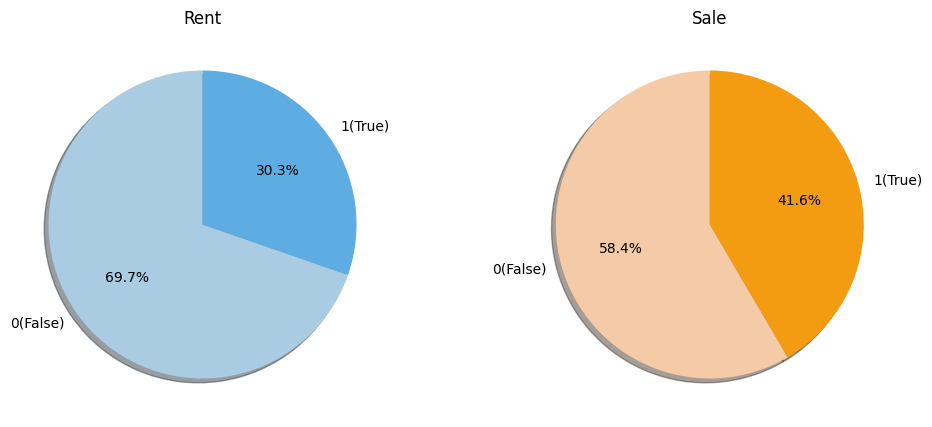

In [16]:
# Para variavel Elevator
print("Variavel Elevator:")
pizza_plot_comp(df_rent, df_sale, "Elevator")

Variavel Furnished:


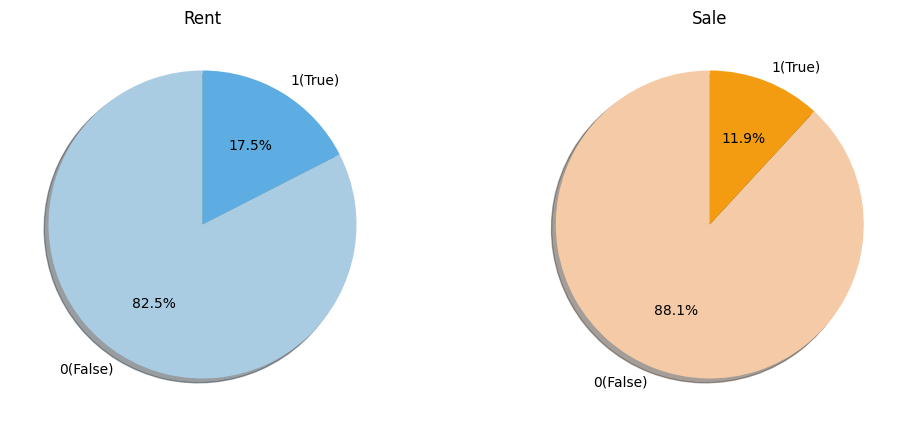

In [17]:
# Para variavel Furnished
print("Variavel Furnished:")
pizza_plot_comp(df_main_rent, df_main_sale, "Furnished")

Variavel Swimming Pool:


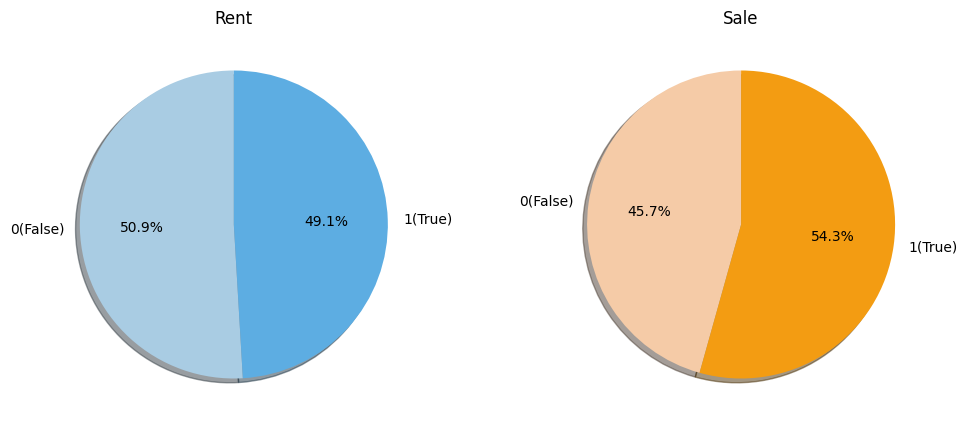

In [18]:
# Para variavel Swimming Pool
print("Variavel Swimming Pool:")
pizza_plot_comp(df_rent, df_main_sale, "Swimming Pool")

Variavel New:


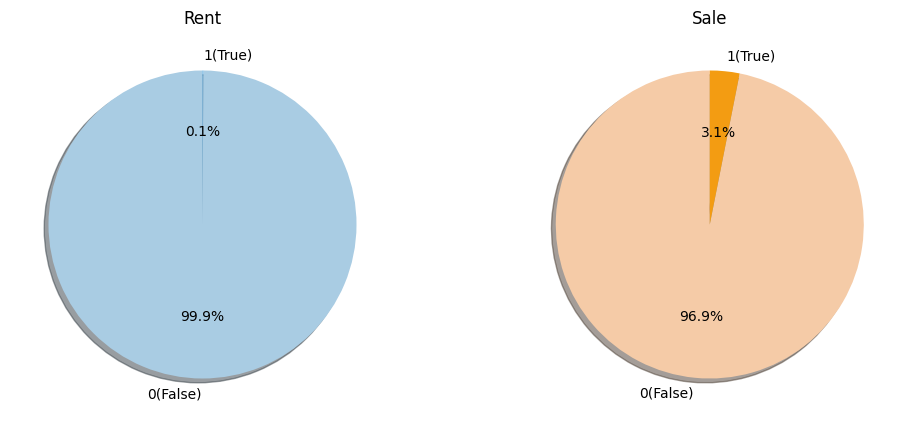

In [19]:
# Para variavel Swimming Pool
print("Variavel New:")
pizza_plot_comp(df_rent, df_sale, "New")

Ao analisar os resultados das colunas de variáveis categóricas, identificamos um desequilíbrio acentuado no número de observações para as variáveis Furnished e New. Para a variável Furnished, é possível estratificar as amostras de teste e treinamento a fim de preservar essa desproporção inerente. No entanto, em relação à variável New, especialmente no banco de dados de apartamentos disponíveis para aluguel, o desequilíbrio é tão pronunciado que torna impraticável sua utilização neste estudo. Por isso, optamos por excluí-la.

In [20]:
# Retirando a variável new dos dataframes 
df_rent = df_rent.drop(columns=["New"])
df_sale = df_sale.drop(columns=["New"])

### **Análise Exploratória**

O objetivo principal deste projeto, tanto para o df_rent quanto para o df_sale, é realizar uma predição do valor da coluna `price`. Considerando que ambos os dataframes têm um número limitado de variáveis preditoras, faremos uma análise de cada coluna e seu respectivo impacto nessa variável resposta. Começaremos avaliando a correlação entre todas as variáveis.

Para avaliar a correlação, utilizaremos a função corr(), que mede a correlação de Pearson entre pares de colunas numéricas. Esta métrica nos fornece uma indicação da relação linear entre duas variáveis. No entanto, ela não é apropriada para colunas categóricas, por isso, focaremos na correlação entre as colunas condo, size, rooms, toilets, suites e parking. É importante mencionar que as colunas rooms, toilets e suites representam variáveis quantitativas discretas. Portanto, esse método de cálculo de correlação pode não ser o mais indicado para esses atributos, podendo não fornecer resultados ideais. Ainda assim, prosseguiremos com esta análise neste estágio inicial.

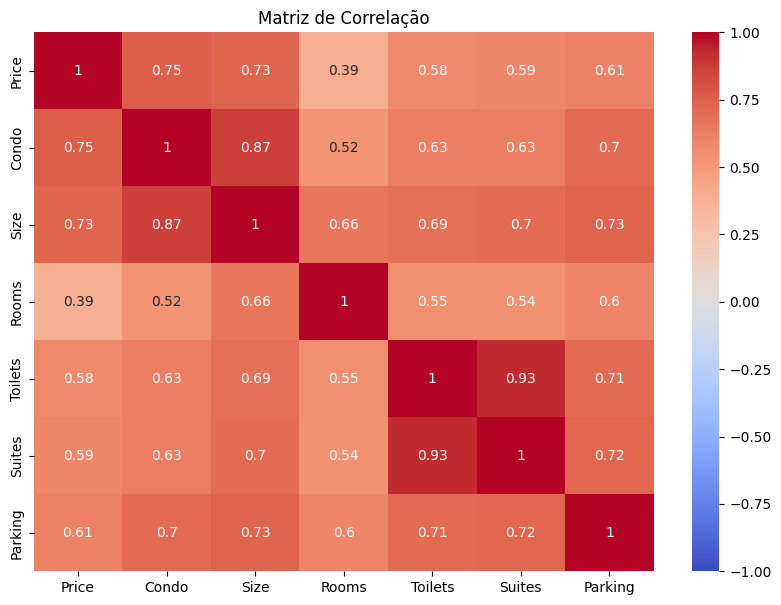

In [21]:
# Cálculando correlação entre preditoras para df_rent
corr_matrix_rent = df_rent.drop(columns=["Elevator", "Furnished", "Swimming Pool", "Latitude", "Longitude", "District"]).corr()

# Criando heatmap para visualização
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix_rent, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()


Ao examinar as variáveis com maior ligação à variável resposta, identificamos que as colunas 'Condo' e 'Size' apresentam coeficientes de Pearson superiores a 0.7 quando comparadas com a coluna 'Price'. Outra correlação notável ocorre entre as variáveis 'Suites' e 'Toilets', com um coeficiente positivo de 0.92. Isso sugere que apartamentos com mais suítes tendem a ter mais banheiros, o que é lógico, visto que uma suíte é um quarto com banheiro integrado. Também é digno de nota a relação entre o tamanho dos apartamentos e o número de vagas de garagem, sugerindo que apartamentos maiores geralmente têm mais vagas disponíveis. 

Também vale ressaltar que existe uma forte correlação entre o tamanho e o preço do condomínio. Esse padrão já havia sido identificado na fase de pré-processamento; no entanto, essa correlação pode ter sido amplificada pela estimativa dos 14% de valores faltantes do preço do condomínio, feita por meio de uma regressão linear com base nas colunas 'price' e 'size'.

#### **Variáveis Quantitativas Continuas**

Dentre as variáveis preditoras que são quantitativas continuas, temos as colunas size e condo, que representam o tamanho do imóvel e o preço do condominio respectivamente. A pricipio parece haver uma forte relação entre o preço anunciado e essas duas variaveis, ambas sendo representadas por um indice de correlação linear maior que 0.7. Para investigar melhor estas situações iremos analisar a natureza de sua distribuição e algumas metricas descritivas.

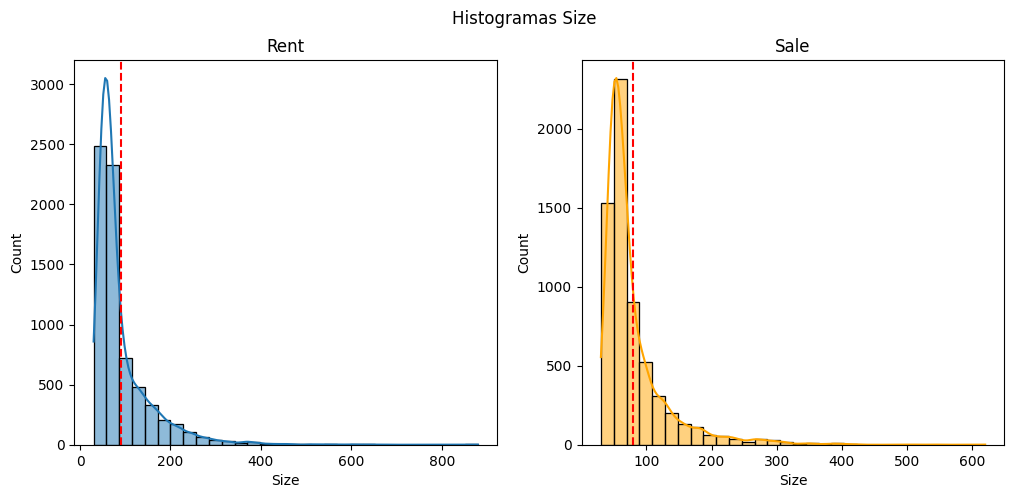

In [22]:
# Histograma da variavel Size
# Comparação de histograma
fig, axs = plt.subplots(ncols=2, figsize=(12,5))

# Plotando Histograma para Rent
sns.histplot(x=df_rent["Size"], bins=30, kde=True, ax=axs[0])
axs[0].set_title("Rent")
axs[0].axvline(df_rent["Size"].mean(), color='red', linestyle='--', label=f'Média: {df_rent["Size"].mean():.2f}')

# Plotando Histograma para Sales
sns.histplot(x=df_sale["Size"], bins=30, kde=True, ax=axs[1], color="orange")
axs[1].set_title("Sale")
axs[1].axvline(df_sale["Size"].mean(), color='red', linestyle='--', label=f'Média: {df_sale["Size"].mean():.2f}')
# Titulo geral
fig.suptitle("Histogramas Size")

plt.show()

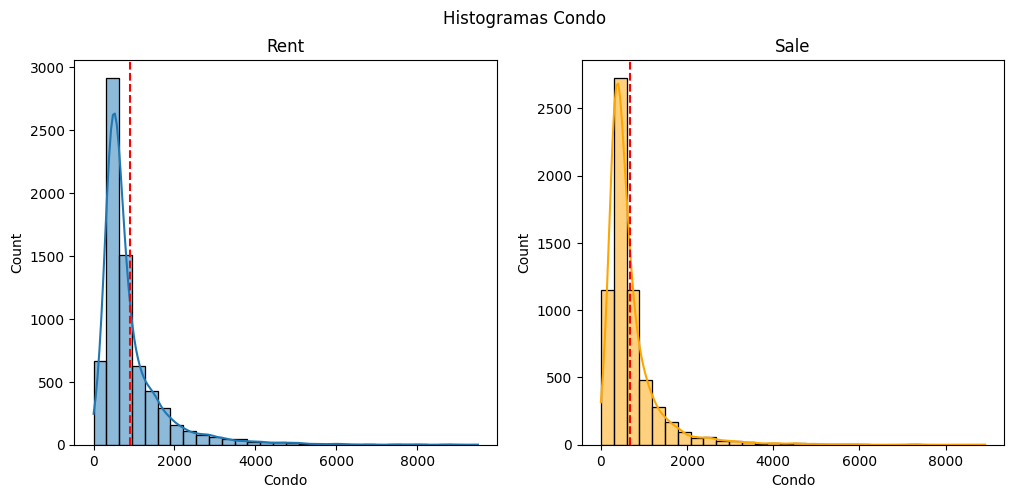

In [23]:
# Histograma da variavel Condo
# Comparação de histograma
fig, axs = plt.subplots(ncols=2, figsize=(12,5))

# Plotando Histograma para Rent
sns.histplot(x=df_rent["Condo"], bins=30, kde=True, ax=axs[0])
axs[0].set_title("Rent")
axs[0].axvline(df_rent["Condo"].mean(), color='red', linestyle='--', label=f'Média: {df_rent["Condo"].mean():.2f}')


# Plotando Histograma para Sales
sns.histplot(x=df_sale["Condo"], bins=30, kde=True, ax=axs[1], color="orange")
axs[1].set_title("Sale")
axs[1].axvline(df_sale["Condo"].mean(), color='red', linestyle='--', label=f'Média: {df_sale["Condo"].mean():.2f}')


# Titulo geral
fig.suptitle("Histogramas Condo")

plt.show()

Analisando os histogramas gerados, percebemos uma faixa de tamanho e preço de condominio predominantes dentre os dados.

Para avaliar a interação entre essas três variáveis, vamos exibir um gráfico de dispersão tridimensional. O eixo x representará o tamanho do apartamento, o eixo y mostrará o preço do condomínio e a magnitude do ponto indicará o preço listado para venda ou aluguel.

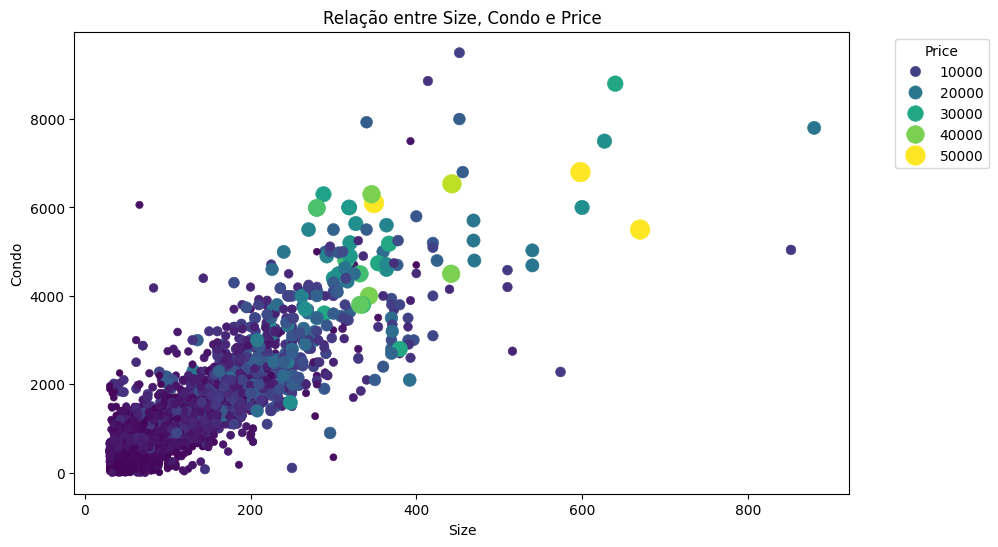

In [24]:
# Gráfico de três dimensões para rent

# Criando figura
plt.figure(figsize=(10, 6))

# Plotando para Rent
sns.scatterplot(data=df_rent, x="Size", y="Condo", hue="Price", palette="viridis", size="Price", sizes=(20,200), edgecolor=None)
plt.legend(title='Price', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Relação entre Size, Condo e Price')

plt.show()

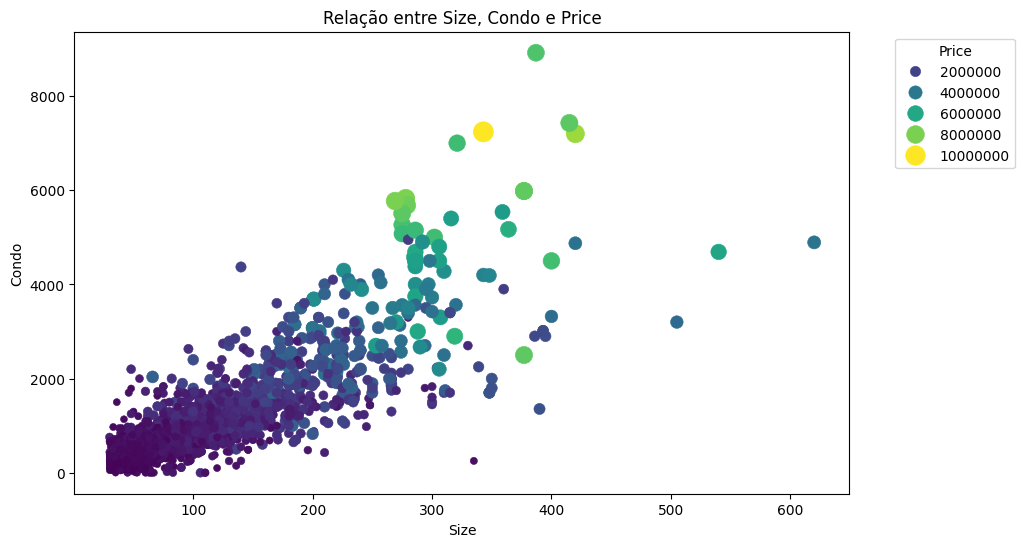

In [25]:
# Gráfico de três dimensões para Sale

# Criando figura
plt.figure(figsize=(10, 6))

# Plotando para Rent
sns.scatterplot(data=df_sale, x="Size", y="Condo", hue="Price", palette="viridis", size="Price", sizes=(20,200), edgecolor=None)
plt.legend(title='Price', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Relação entre Size, Condo e Price')

plt.show()

Ao observar os gráficos, nota-se que, tanto para os apartamentos listados para venda quanto para aluguel, há uma correlação positiva entre essas três variáveis. Conforme o tamanho do apartamento cresce, tanto o preço do condomínio quanto o valor anunciado para venda ou aluguel tendem a aumentar.

Portanto, é provável que os resultados da modelagem final espelhem as correlações identificadas nesta fase. Além disso, para avaliar a influência de outras variáveis, pode ser relevante normalizar o preço anunciado para venda ou aluguel usando a métrica de preço por metro quadrado.

$$price/m = \frac{Price}{Size}$$

<function matplotlib.pyplot.show(close=None, block=None)>

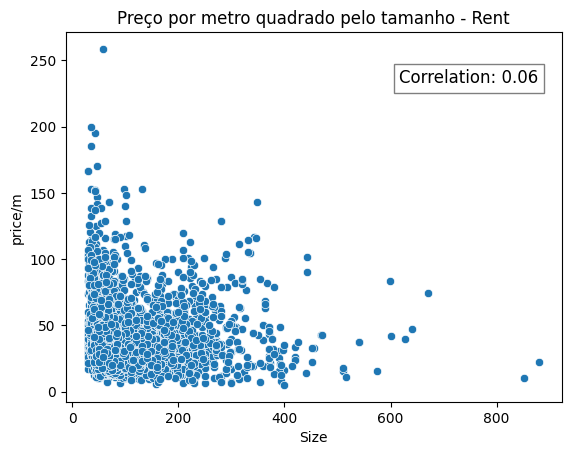

In [26]:
# Criando coluna de preço/metro_quadrado rent
df_rent["price/m"] = df_rent["Price"] / df_rent["Size"]

# Observanddo normalização
sns.scatterplot(data=df_rent, x="Size", y="price/m")

# Calculando o coeficiente de correlação de Pearson
correlation = df_rent['Size'].corr(df_rent['price/m'])

# Adicionando o valor ao gráfico
plt.text(x=df_rent['Size'].max()*0.7, y=df_rent['price/m'].max()*0.9, s=f'Correlation: {correlation:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))


plt.title("Preço por metro quadrado pelo tamanho - Rent")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

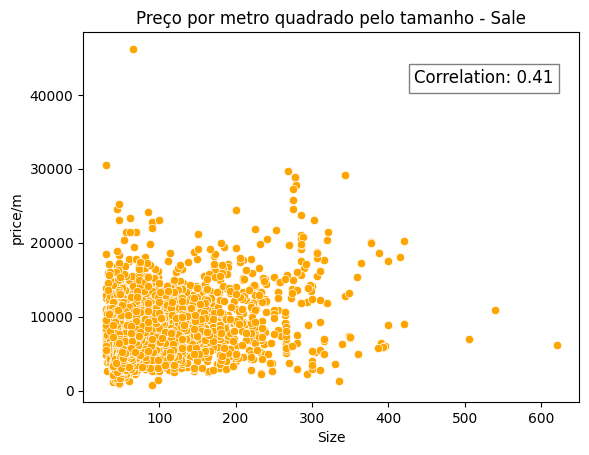

In [27]:
# Criando coluna de preço/metro_quadrado Sale
df_sale["price/m"] = df_sale["Price"] / df_sale["Size"]

# Observanddo normalização
sns.scatterplot(data=df_sale, x="Size", y="price/m", color="orange")

# Calculando o coeficiente de correlação de Pearson
correlation = df_sale['Size'].corr(df_sale['price/m'])

# Adicionando o valor ao gráfico
plt.text(x=df_sale['Size'].max()*0.7, y=df_sale['price/m'].max()*0.9, s=f'Correlation: {correlation:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.title("Preço por metro quadrado pelo tamanho - Sale")

plt.show

Notamos que, após essa normalização, a correlação torna-se praticamente inexistente para os apartamentos listados para aluguel e diminui consideravelmente para aqueles à venda. Esta métrica será útil para compreender a influência das outras variáveis preditoras no preço do apartamento, sem a interferência da variável 'size' na análise.

#### **Variáveis Quantitativas Discretas**

Dentro das variáveis quantitativas discretas, consideramos o número de quartos (Rooms), banheiros (Toilets), suítes (Suites) e vagas na garagem (Parking). Neste segmento da análise, queremos compreender o efeito dessas variáveis na variável objetivo. Como há uma forte relação entre o preço e o tamanho do apartamento, para avaliar o verdadeiro impacto dessas variáveis no valor anuciado do apartamento, vamos focar na métrica de preço por metro quadrado. Em outras palavras, queremos verificar se apartamentos de tamanho semelhante tendem a ter um valor por metro quadrado mais elevado devido à presença de uma vaga de garagem adicional ou uma suíte a mais, por exemplo.

Primeiramente será necessario criar uma nova coluna classificando cada linha do dataframe de acordo com a faixa de tamanho correspondente.

In [28]:
# Criando faixas de tamanho
faixas_size = [x for x in range(30, 300, 10)]
faixas_size.append(float("inf"))

# Ajustando nomeclatura de cada faixa de tamanho
labels_faixa_size = [f"{x}-{x+10}" for x in faixas_size if x != float("inf")]
labels_faixa_size[-1] = "300+"

# Aplicando classificação para cada tamanho 
# Rent
df_rent["size_group"] = pd.cut(df_rent["Size"], bins=faixas_size, labels=labels_faixa_size, right=False)

# Sale
df_sale["size_group"] = pd.cut(df_sale["Size"], bins=faixas_size, labels=labels_faixa_size, right=False)

In [29]:
# Visualizando quantidade de apartamentos por faixa de rent
df_rent["size_group"].value_counts(sort=False)

size_group
30-40       335
40-50       916
50-60      1268
60-70      1159
70-80       790
80-90       410
90-100      316
100-110     202
110-120     195
120-130     180
130-140     161
140-150     143
150-160     116
160-170     119
170-180      89
180-190      92
190-200      54
200-210      67
210-220      49
220-230      53
230-240      38
240-250      31
250-260      43
260-270      19
270-280      20
280-290      21
300+        133
Name: count, dtype: int64

In [30]:
# Visualizando quantidade de apartamentos por faixa de Sale
df_sale["size_group"].value_counts(sort=False)

size_group
30-40       329
40-50      1201
50-60      1323
60-70       988
70-80       585
80-90       336
90-100      308
100-110     207
110-120     146
120-130     155
130-140     116
140-150      88
150-160      69
160-170      60
170-180      42
180-190      73
190-200      26
200-210      31
210-220      20
220-230      33
230-240      26
240-250      12
250-260      12
260-270      23
270-280      13
280-290      17
300+         63
Name: count, dtype: int64

É perceptível que as faixas de maior tamanho têm poucas observações, o que pode afetar a análise. Portanto, devemos ter mais cautela ao interpretar os resultados nessas categorias. No entanto, a maioria das faixas apresenta uma quantidade adequada de dado

A tratativa para observar o impacto dessas variaveis quantitavas discretas será determinar o preço médio do metro quadrado e tentar identificar um padrão para aqueles valores que estão acima ou abaixo desta média.

In [31]:
# Obtendo as métricas para cada faixa de rent
df_size_group_rent = df_rent[["size_group", "price/m"]].groupby('size_group', observed=False).agg(["mean", "std"])


df_size_group_rent

price/m           
                 mean        std
size_group                      
30-40       57.232647  30.032115
40-50       36.994862  21.366744
50-60       29.328349  14.841037
60-70       30.058305  15.139147
70-80       29.890238  15.687458
80-90       29.965864  14.511230
90-100      31.010996  17.639604
100-110     35.701837  21.894770
110-120     31.983614  16.256563
120-130     32.405674  15.236997
130-140     33.524206  19.112768
140-150     31.986499  14.386608
150-160     34.690090  18.398835
160-170     36.490602  20.208993
170-180     35.027870  15.374796
180-190     33.753126  16.082795
190-200     33.500684  17.874430
200-210     39.818109  27.585220
210-220     41.230084  17.673198
220-230     45.894800  25.921612
230-240     37.378972  22.385512
240-250     44.611776  23.028739
250-260     38.180831  16.497501
260-270     48.468882  23.349358
270-280     36.459103  16.721099
280-290     50.089566  38.271567
300+        41.880294  28.603532

In [32]:
# Obtendo as métricas para cada faixa de sale
df_size_group_sale = df_sale[["size_group", "price/m"]].groupby('size_group', observed=False).agg(['mean', 'std'])

df_size_group_sale

price/m             
                    mean          std
size_group                           
30-40        7469.508263  3273.140041
40-50        5513.096044  2402.311595
50-60        5635.583993  2084.958094
60-70        6479.110891  2547.269838
70-80        7254.067020  2644.664297
80-90        7903.142546  2857.601556
90-100       7801.636360  2827.363422
100-110      8262.327639  2728.817648
110-120      8116.241105  2796.546851
120-130      8420.562560  2801.656887
130-140      8710.819121  2857.086728
140-150      8695.881274  2882.046156
150-160      9003.016250  3556.998538
160-170      9383.074886  3523.779307
170-180      9650.827191  3928.930939
180-190      8798.392802  4463.623048
190-200      9214.613936  4005.365419
200-210     11207.981163  5571.874631
210-220     10732.609241  3964.790686
220-230      9846.516201  4180.058624
230-240      9396.353267  4482.109261
240-250      8805.439850  5671.591378
250-260     12519.151697  3843.856747
260-270      9009.699531  5279.400987
270-280     18990.366059  8844.785757
280-290     16270.199751  5938.805905
300+        11807.490295  6721.885489

Agora, iremos classificar os apartamentos de acordo com esta média, o intuito é verificar se os apartamentos com um valor por metro quadrado acima da média de sua categoria de tamanho têm uma vantagem em termos de número de quartos, banheiros, suítes ou vagas de garagem.

In [33]:
# Renomear as colunas do df_size_group_rent para facilitar a junção
df_size_group_rent.columns = ['mean_price/m', 'std_price/m']

# Mesclar os DataFrames
df_rent = df_rent.merge(df_size_group_rent, on='size_group', how='left')

# Criar a coluna size_price/m_flag
df_rent['size_price/m_flag'] = df_rent.apply(lambda x: 1 if x['price/m'] > x['mean_price/m'] else 0, axis=1)

In [34]:
# Renomear as colunas do df_size_group_sale para facilitar a junção
df_size_group_sale.columns = ['mean_price/m', 'std_price/m']

# Mesclar os DataFrames
df_sale = df_sale.merge(df_size_group_sale, on='size_group', how='left')

# Criar a coluna size_price/m_flag
df_sale['size_price/m_flag'] = df_sale.apply(lambda x: 1 if x['price/m'] > x['mean_price/m'] else 0, axis=1)



Para podermos visualizar foi criada a função table_size_mean_comp que analisa as características médias dos apartamentos baseadas em seu preço, separando-os em duas categorias: acima e abaixo da média. Para cada categoria, ela calcula as médias das características "Rooms", "Toilets", "Suites", e "Parking", agrupadas por size_group. O resultado final, part_final, é um dataframe que apresenta essas médias lado a lado para cada size_group, além de mostrar a diferença entre as médias das duas categorias. Essa função permite uma comparação direta de como as características dos apartamentos variam dependendo de seus preços em relação à média.

In [35]:
def table_size_mean_comp(df1):
    # Cálculos para apartamentos com preço acima da média
    part1 = df1[df1["size_price/m_flag"] == 1][["size_group", "Rooms", "Toilets", "Suites", "Parking"]].groupby("size_group", observed=False).agg({
        "Rooms": "mean",
        "Toilets": "mean",
        "Suites": "mean",
        "Parking": "mean"
    })
    part1 = part1.rename(columns={"Rooms": "Rooms_1", "Toilets": "Toilets_1", "Suites": "Suites_1", "Parking": "Parking_1"})

    # Cálculos para apartamentos com preço abaixo da média
    part2 = df1[df1["size_price/m_flag"] == 0][["size_group", "Rooms", "Toilets", "Suites", "Parking"]].groupby("size_group", observed=False).agg({
        "Rooms": "mean",
        "Toilets": "mean",
        "Suites": "mean",
        "Parking": "mean"
    })
    part2 = part2.rename(columns={"Rooms": "Rooms_0", "Toilets": "Toilets_0", "Suites": "Suites_0", "Parking": "Parking_0"})

    # Dataframe final que será retornado
    part_final = pd.concat([part1, part2], axis=1)
    part_final["Rooms_dif"] = part_final["Rooms_1"] - part_final["Rooms_0"]
    part_final["Toilets_dif"] = part_final["Toilets_1"] - part_final["Toilets_0"]
    part_final["Suites_dif"] = part_final["Suites_1"] - part_final["Suites_0"]
    part_final["Parking_dif"] = part_final["Parking_1"] - part_final["Parking_0"]

    return part_final

Para visualizar os resultado foi criada a função graphic_size_mean_comp que gera dois gráficos de barras verticais, um para "Rent" e outro para "Sale", mostrando as diferenças nas características médias dos apartamentos baseadas em seus preços (acima ou abaixo da média). Cada gráfico é gerado com base nas diferenças calculadas pela função table_size_mean_comp.

O resultado desses gráficos oferecem uma visualização mais direta de como as características dos apartamentos (seja "Rooms", "Toilets", "Suites" ou "Parking") variam em função de seus preços (acima ou abaixo da média) para aluguel ("Rent") e venda ("Sale").

In [36]:
def graphic_size_mean_comp(df1, df2, variable):
    # Criando figura e dois eixos
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

    # Plotando gráfico para rent
    variable_dif = variable + "_dif"
    rent_data = table_size_mean_comp(df1)
    colors_rent = ["#A9CCE3" if value > 0 else "#5DADE2" for value in rent_data[variable_dif]]
    sns.barplot(x=rent_data.index, y=rent_data[variable_dif], dodge=True, ax=ax1)
    ax1.set_title("Rent")
    for i, bar in enumerate(ax1.patches):
        bar.set_color(colors_rent[i])

    # Plotando gráfico para sale
    sale_data = table_size_mean_comp(df2)
    colors_sale = ["#F5CBA7" if value > 0 else "#F39C12" for value in sale_data[variable_dif]]
    sns.barplot(x=sale_data.index, y=sale_data[variable_dif], dodge=True, ax=ax2)
    ax2.set_title("Sale")
    for i, bar in enumerate(ax2.patches):
        bar.set_color(colors_sale[i])

    # Ajustando a angulação dos labels do eixo x
    ax1.set_xticks(range(len(rent_data.index)))
    ax1.set_xticklabels(rent_data.index, rotation=45)
    ax2.set_xticks(range(len(sale_data.index)))
    ax2.set_xticklabels(sale_data.index, rotation=45)

    # Ajustando o layout para evitar sobreposição
    plt.tight_layout()

    plt.show()

Com a função criada podemos aplicar ela para cada variável quantiva discreta.

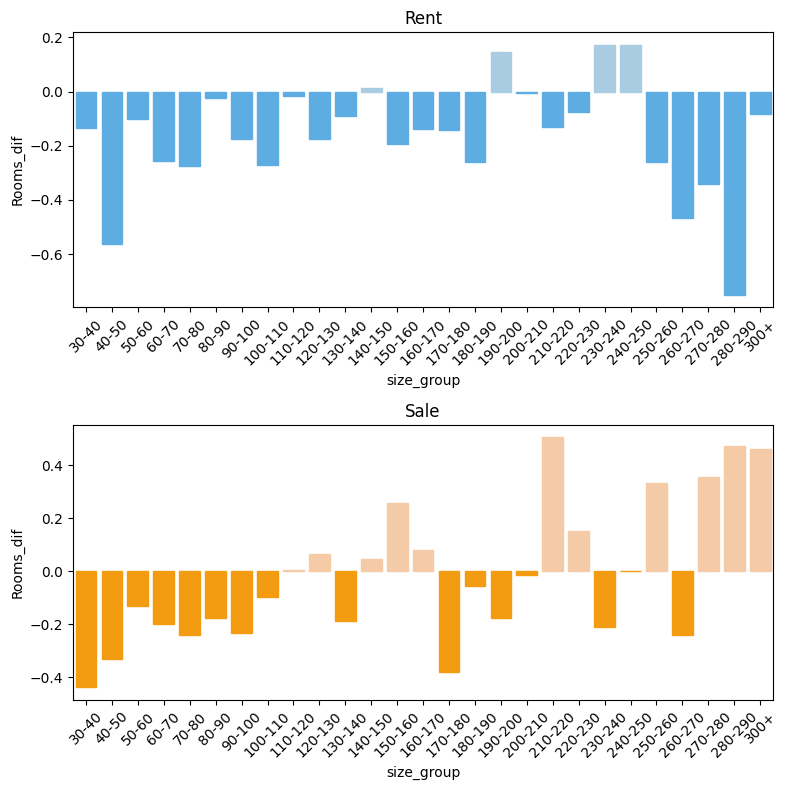

In [37]:
# Para variável rooms
graphic_size_mean_comp(df_rent, df_sale, "Rooms")

Com base na métrica selecionada, observou-se que apartamentos de tamanhos similares, mas com menos quartos, contraintuitivamente possuem um valor por metro quadrado mais elevado do que aqueles com mais quartos. Essa tendência foi mais acentuada nos apartamentos listados para aluguel. Já nos apartamentos à venda, houve um equilíbrio mais evidente, com uma ligeira vantagem de preço para apartamentos que possuem mais quartos e maior metragem.


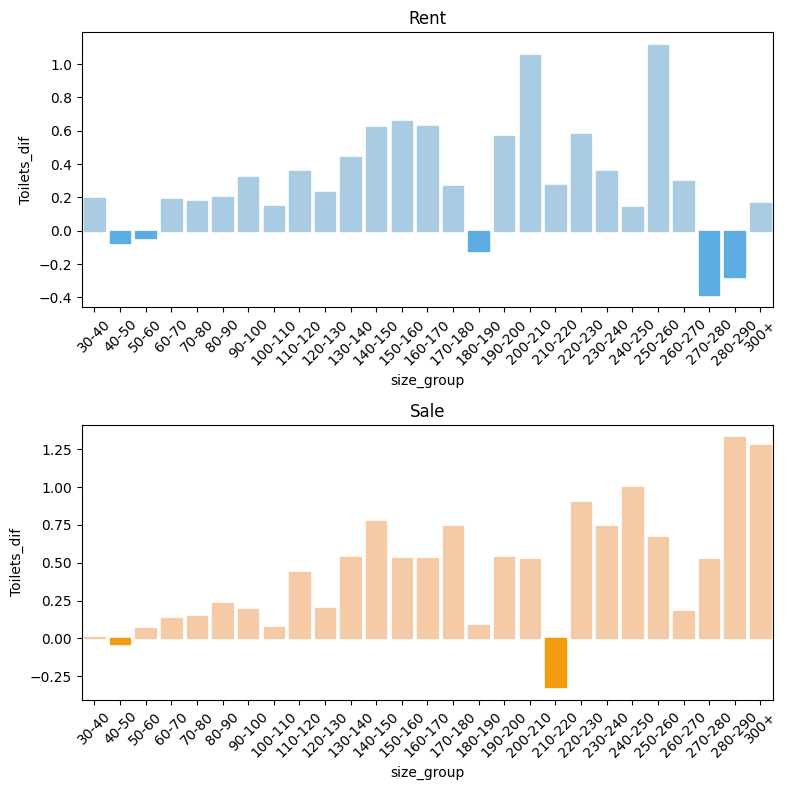

In [38]:
# Para variável toilets
graphic_size_mean_comp(df_rent, df_sale, "Toilets")

Conforme esperado, no caso do número de banheiros, apartamentos com mais banheiros geralmente exibem um valor por metro quadrado superior comparado a apartamentos de tamanhos similares, mas com menos banheiros. Entretanto, existem algumas poucas exceções em determinadas faixas de tamanho.

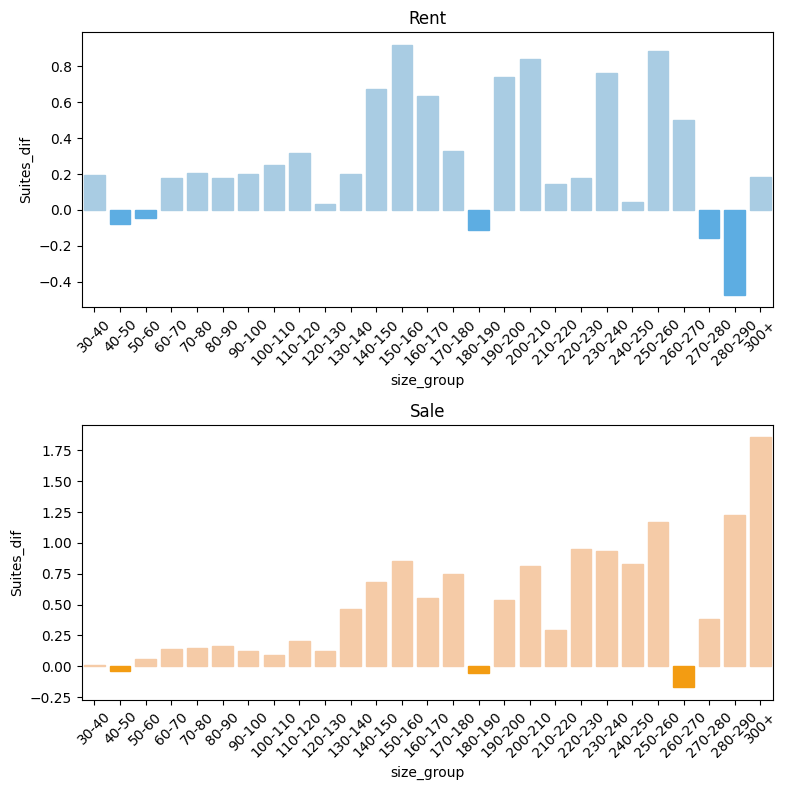

In [39]:
# Para variável 
graphic_size_mean_comp(df_rent, df_sale, "Suites")

Assim como no caso da variavel toilets, apartamentos que possuem mais Suites, tendem a apresentar um preço de metro quadrado mais elevados quando comparado com apartamentos com menos suites.

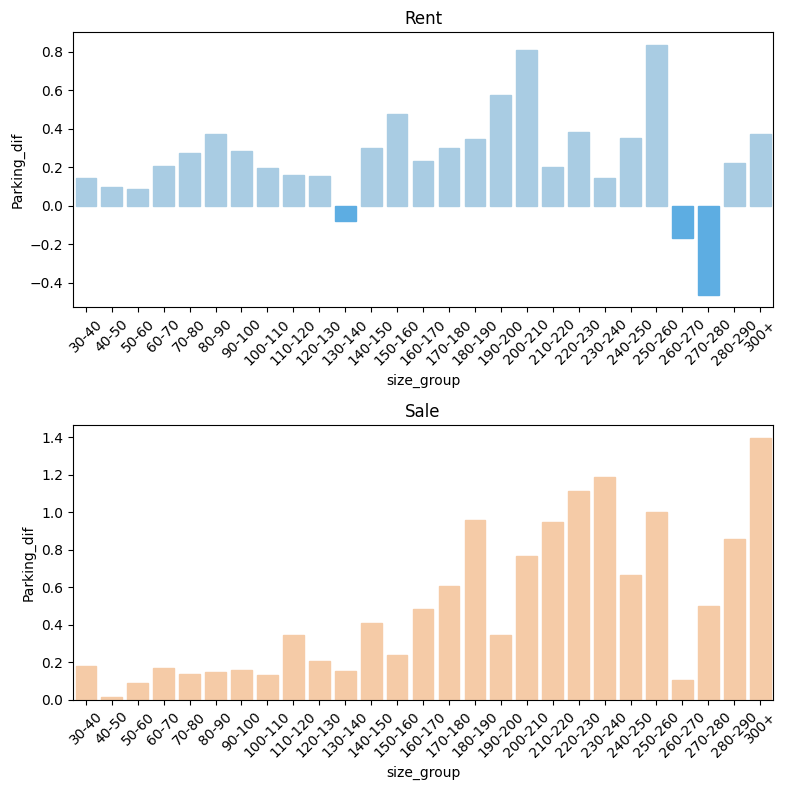

In [40]:
# Para variável 
graphic_size_mean_comp(df_rent, df_sale, "Parking")

E de todas as variáveis discretas analisadas, a variável parking demonstrou uma maior tendencia de valorização do metro quadrado.

Assim concluimos que estas variaveis parecem ter uma influencia na tendencia de preço. No entanto, é importante salientar que a métrica adotada tem suas limitações. Além disso, fatores como a localização do imóvel também podem impactar o valor por metro quadrado.

Podemos retirar a coluna size_price/m_flag dos dataframes.

In [41]:
# Retirando coluna dos dataframes 
df_rent = df_rent.drop(columns=["size_price/m_flag"])
df_sale = df_sale.drop(columns=["size_price/m_flag"])

#### **Variáveis Qualitativas Binarias**

As colunas Elevator, Furnished e Swimming Pool representam as variáveis categóricas binárias neste dataframe. Para determinar se há uma diferença significativa nos preços dos apartamentos que têm elevador, são mobiliados ou possuem piscina, compararemos as médias de preços por cada intervalo de tamanho do apartamento.

A função abaixo cálcula as médias de preços para cada faixa de tamanho para quando a variavel binaria é 1 e para quando a variavel binaria é 0, e retorna no final um gráfico de linha com os desvios padrões para cada um desses casos, facilitando a comparação.

In [42]:
def line_comp_plot(df, variable, rent=True):
    # Criando tabela para flag igual a 1
    table1 = df[df[variable] == 1][["size_group", "Price"]].groupby("size_group", observed=False).agg(["mean", "std"])
    # Criando tabela para Flag igual a 2
    table2 = df[df[variable] == 0][["size_group", "Price"]].groupby("size_group", observed=False).agg(["mean", "std"])

    # Criando figura para o gráfico
    plt.figure(figsize=(10, 6))

    # Gráfico corresponde a tabela 1
    sns.lineplot(x=table1.index, y=table1["Price"]["mean"], errorbar="sd", err_style="band", err_kws={"alpha": 0.2}, label="Flag 1", color="blue")
    plt.fill_between(table1.index,
                     table1["Price"]["mean"] - table1["Price"]["std"],
                     table1["Price"]["mean"] + table1["Price"]["std"],
                     color="blue", alpha=0.1
                     )
    
    # Gráfico corresponde a tabela 2
    sns.lineplot(x=table2.index, y=table2["Price"]["mean"], errorbar="sd", err_style="band", err_kws={"alpha": 0.2}, label="Flag 0", color="red")
    plt.fill_between(table2.index,
                     table2["Price"]["mean"] - table2["Price"]["std"],
                     table2["Price"]["mean"] + table2["Price"]["std"],
                     color="red", alpha=0.1
                     )
    
    plt.xticks(rotation = 45)

    if rent:
        plt.title(f"{variable} - Rent")
    else:
        plt.title(f"{variable} - Sale")
    plt.legend()

    return plt.show()


Aplicando na variavel elevator:

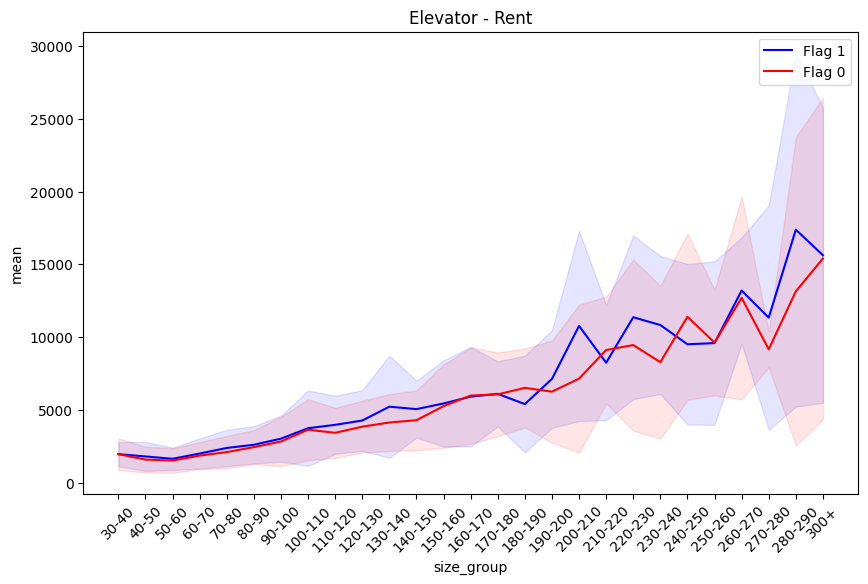

In [43]:
# Para os apartamenotos disponiveis para aluguel 
line_comp_plot(df_rent, "Elevator")

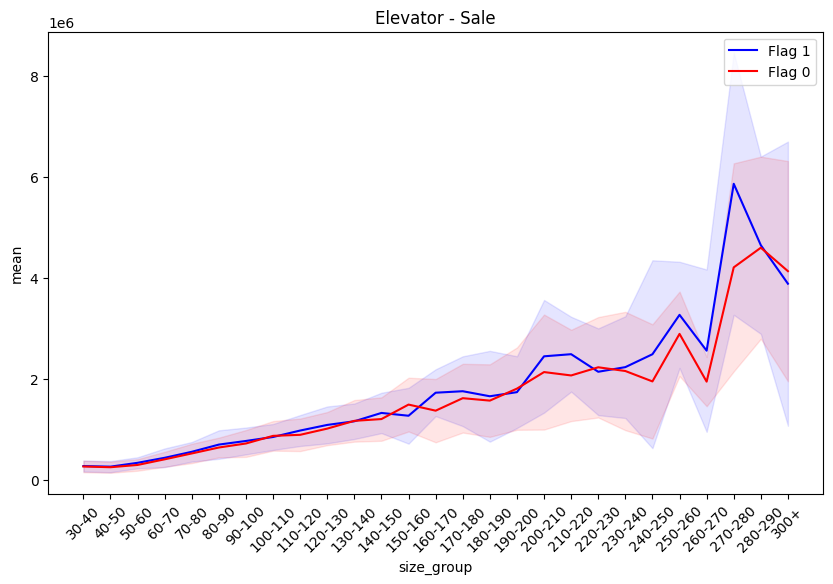

In [44]:
# Para os apartamenotos disponiveis para venda
line_comp_plot(df_sale, "Elevator", rent=False)

Observando os gráficos gerados acima, aparentemente não existe uma diferença siginificativa em apartamentos que posuem elevador.

A próxima variável analisada sera Furnished.

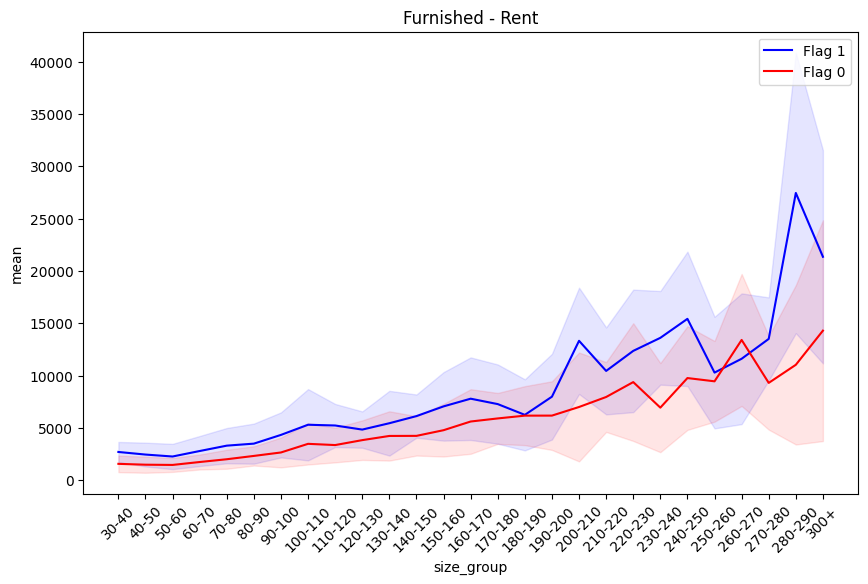

In [45]:
# Para os apartamenotos disponiveis para aluguel
line_comp_plot(df_rent, "Furnished")

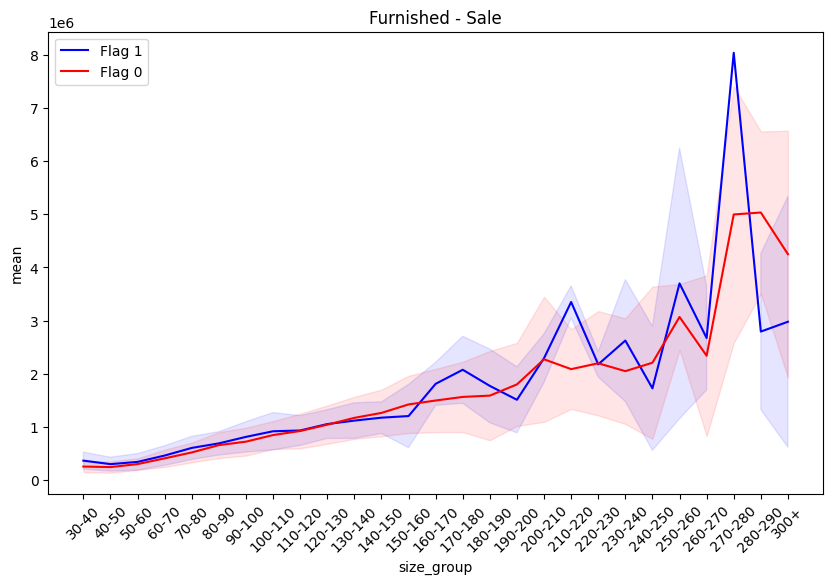

In [46]:
# Para os apartamenotos disponiveis para venda
line_comp_plot(df_sale, "Furnished", rent=False)

Para os apartamentos mobiliados listados para aluguel, observamos que, em quase todas as faixas de tamanho, o preço médio é mais alto do que para aqueles não mobiliados. No entanto, para os apartamentos à venda, essa discrepância não foi evidenciada.

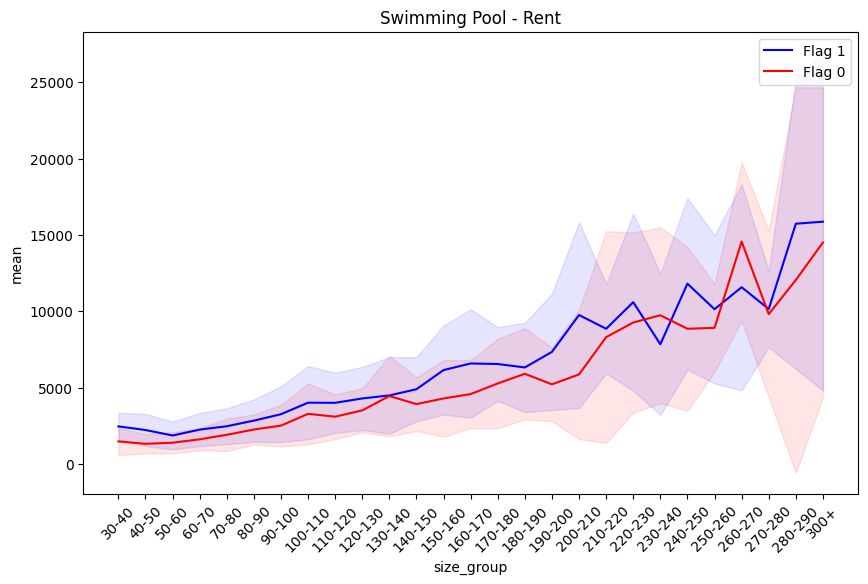

In [47]:
# Para os apartementos listados para aluguel
line_comp_plot(df_rent, "Swimming Pool")

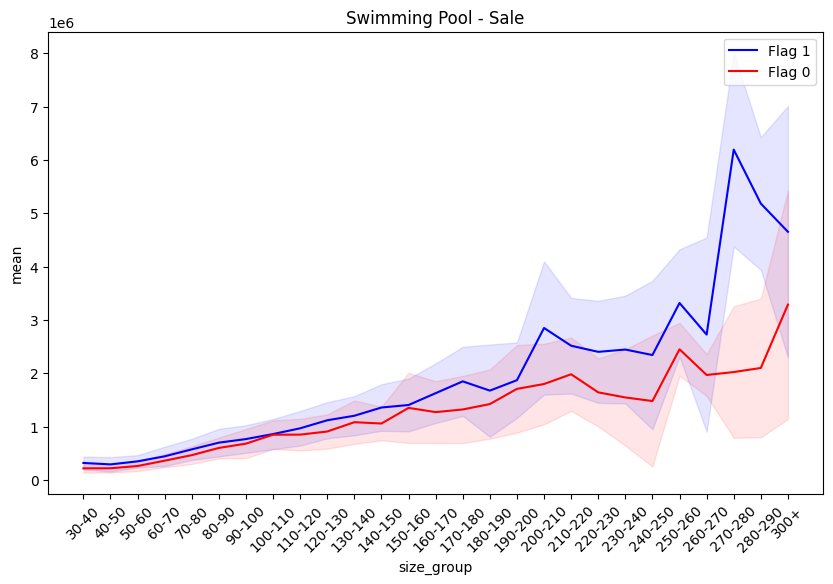

In [48]:
# Para os apartementos listados para venda
line_comp_plot(df_sale, "Swimming Pool", rent=False)

Em relação aos apartamentos que possuem piscina, notamos que os listados para aluguel apresentam um aumento sutil no preço médio para aqueles com até 230 metros quadrados. Para apartamentos maiores do que isso, essa diferença não é tão marcante. Por outro lado, nos apartamentos à venda, a diferença é quase imperceptível para unidades menores. No entanto, para apartamentos com mais de 150 metros quadrados, há um aumento notável no preço médio quando estão equipados com uma piscina.

#### **Variáveis de Localização**

Dentre as variáveis preditoras, existem três variaveis que apresentam informações sobre a localização dos apartametos, são elas as variáveis de Districts, que representa os bairros, e as variáveis de latitude e longitude.

Inicialmente, vamos examinar a variável "district" e seu impacto nos preços dos imóveis. Para mitigar a influência da variável "size" na análise, consideraremos da localização do apartamento com base no preço por metro quadrado.

In [49]:
# Apartamentos para Aluguel
df_rent["District"].value_counts().shape[0]

94

Existem 94 bairros distintos para os apartamentos listados para alugar.

In [50]:
# Apartamentos a venda
df_sale["District"].value_counts().shape[0]

96

Para os apartamentos listados à venda, contamos com 96 bairros distintos. A variável "district" é categórica, o que significa que temos mais de noventa categorias diferentes nessa coluna. Isso pode complicar a interpretação de certos modelos.

In [51]:
# Verificando o numero de observações (Rent)
df_rent["District"].value_counts().tail(15)

District
Jardim Ângela/São Paulo      26
Pedreira/São Paulo           25
Pari/São Paulo               25
Itaim Paulista/São Paulo     24
Jardim Helena/São Paulo      23
São Miguel/São Paulo         22
Raposo Tavares/São Paulo     17
São Rafael/São Paulo         10
Sé/São Paulo                  9
Ponte Rasa/São Paulo          9
Lajeado/São Paulo             8
Guaianazes/São Paulo          6
Parque do Carmo/São Paulo     6
Jardim São Luis/São Paulo     3
Grajaú/São Paulo              2
Name: count, dtype: int64

In [52]:
# Verificando o numero de observações (Sale)
df_sale["District"].value_counts().tail(15)

District
Pedreira/São Paulo          34
Brasilândia/São Paulo       34
São Domingos/São Paulo      34
São Rafael/São Paulo        34
Morumbi/São Paulo           34
Socorro/São Paulo           33
Lapa/São Paulo              33
Rio Pequeno/São Paulo       32
Butantã/São Paulo           31
Cachoeirinha/São Paulo      31
Freguesia do Ó/São Paulo    30
Vila Sônia/São Paulo        30
Jaraguá/São Paulo           22
Perus/São Paulo             21
Iguatemi/São Paulo          20
Name: count, dtype: int64

Em relação ao número de observações por categoria, o dataframe de aluguel apresentou desafios. Vários bairros têm menos de 10 observações, limitando nossa capacidade de extrair insights significativos dessas áreas. Além disso, há bairros com apenas duas observações. Isso significa que, ao dividir o dataframe em conjuntos de teste e treinamento, esses bairros teriam apenas uma observação em cada conjunto. Devido a essas limitações, optaremos por uma abordagem alternativa, recategorizando esses dados com base em sua localização, usando as colunas de Latitude e Longitude.

Para analisar a relação entre o bairro, latitude e longitude e seu impacto nos preços, visualizaremos em um mapa as médias do preço por metro quadrado para cada distrito.

In [53]:
# Criando tabela de preço do metro/quadrado médio por bairro
# Para rent
district_price_comp_rent = df_rent[["price/m", "District", "Latitude", "Longitude"]].groupby("District").agg(
    {
    "price/m": ["mean", "std", "count"],
    "Latitude": "median",
    "Longitude": "median"
    }
)

# Para Sale
district_price_comp_sale = df_sale[["price/m", "District", "Latitude", "Longitude"]].groupby("District").agg(
    {
    "price/m": ["mean", "std", "count"],
    "Latitude": "median",
    "Longitude": "median"
    }
)


In [54]:
# Visualizando os top10 bairros com mais de 30 observações (Rent)
district_price_comp_rent["price/m"][district_price_comp_rent["price/m"]["count"] > 30].sort_values("mean", ascending=False).head(10)

,mean,std,count
District,,,
Iguatemi/São Paulo,83.215784,39.688086,33
Vila Olimpia/São Paulo,80.081521,22.904821,44
Itaim Bibi/São Paulo,74.462495,34.921306,140
Brooklin/São Paulo,63.035632,19.788732,111
Pinheiros/São Paulo,60.925117,30.712342,152
Consolação/São Paulo,58.070129,23.275912,109
Vila Madalena/São Paulo,54.580293,24.795749,65
Moema/São Paulo,53.564010,20.093938,163
Campo Belo/São Paulo,52.058258,20.778233,130


In [55]:
# Visualizando os tail10 bairros com mais de 30 observações (Rent)
district_price_comp_rent["price/m"][district_price_comp_rent["price/m"]["count"] > 30].sort_values("mean", ascending=False).tail(10)

,mean,std,count
District,,,
Mandaqui/São Paulo,21.475267,5.628754,73
Itaquera/São Paulo,21.368717,5.222359,65
Cidade Tiradentes/São Paulo,21.326349,15.146529,33
Tremembé/São Paulo,21.172862,4.479974,33
São Mateus/São Paulo,21.049613,4.468846,53
Brasilândia/São Paulo,20.914791,6.450755,45
Cidade Líder/São Paulo,19.886914,4.187246,46
Jaçanã/São Paulo,19.368686,5.781417,33
Artur Alvim/São Paulo,18.873627,3.632026,73


In [56]:
# Visualizando os top10 bairros com mais de 30 observações (Sale)
district_price_comp_sale["price/m"][district_price_comp_sale["price/m"]["count"] > 30].sort_values("mean", ascending=False).head(10)

,mean,std,count
District,,,
Vila Olimpia/São Paulo,14467.924708,4568.869534,39
Itaim Bibi/São Paulo,14265.782936,4995.888421,76
Alto de Pinheiros/São Paulo,12644.409430,4356.730360,97
Vila Madalena/São Paulo,12048.614872,2983.214177,41
Moema/São Paulo,11827.901099,3489.008323,130
Jardim Paulista/São Paulo,11813.187554,3391.555115,77
Pinheiros/São Paulo,11549.891618,2953.605386,92
Brooklin/São Paulo,10872.063530,2456.330930,137
Campo Belo/São Paulo,10555.173447,2497.345483,50


In [57]:
# Visualizando os tail10 bairros com mais de 30 observações (Rent)
district_price_comp_sale["price/m"][district_price_comp_sale["price/m"]["count"] > 30].sort_values("mean", ascending=False).tail(10)

,mean,std,count
District,,,
Cidade Líder/São Paulo,4311.586167,700.152811,74
Medeiros/São Paulo,4259.777824,795.890872,49
Itaquera/São Paulo,4204.737729,664.610732,75
Grajaú/São Paulo,4137.425828,706.240719,35
Artur Alvim/São Paulo,4002.817334,609.242217,83
Itaim Paulista/São Paulo,3949.974574,1431.666366,40
São Rafael/São Paulo,3579.561383,477.979064,34
Guaianazes/São Paulo,3531.271038,1149.372357,69
Lajeado/São Paulo,3529.532327,601.497841,35


É notável que, tanto para os apartamentos listados para aluguel quanto para venda, há uma variação considerável no preço por metro quadrado entre diferentes bairros. Isso sugere que a localização do imóvel exerce um impacto significativo em seu valor.

Para entender melhor este impacto, iremos plotar estas diferenças no mapa de São Paulo, utilizando os valores de latitude e longitude.

In [58]:
fig = px.scatter_mapbox(lat=district_price_comp_rent["Latitude"]["median"],
                        lon=district_price_comp_rent["Longitude"]["median"],
                        color=district_price_comp_rent["price/m"]["mean"],
                        size=district_price_comp_rent["price/m"]["mean"],
                        zoom=9.5,
                        height=600,
                        mapbox_style="carto-positron"
)

fig.show()

In [59]:
fig = px.scatter_mapbox(lat=district_price_comp_sale["Latitude"]["median"],
                        lon=district_price_comp_sale["Longitude"]["median"],
                        color=district_price_comp_sale["price/m"]["mean"],
                        size=district_price_comp_sale["price/m"]["mean"],
                        zoom=9.5,
                        height=600,
                        mapbox_style="carto-positron"
)

fig.show()

Como podemos observar pelo mapa, para ambos os casos a região central possui um preço por metro quadrado médio maior que as regiões mais afastadas. Logo o tratamento que será realizado será neste sentido, classificando os apartamentos conforme ele se afasta das regiões mais valorizadas.

Serão criadas 4 classificações de barros: Classe A, Classe B, Classe C e Classe D. No qual a classe A representa a região no qual o preço do metro quadrado é o mais elevado e conforme a distancia vai aumentando os apartamentos vão diminuino de classe.

Primeiramente iremos determinar os pontos centrais.

In [60]:
# Ponto central Rent
central_district_rent = [district_price_comp_rent.sort_values(("price/m", "mean"), ascending=False)["Latitude"]["median"][0],
                         district_price_comp_rent.sort_values(("price/m", "mean"), ascending=False)["Longitude"]["median"][0]]

central_district_rent

C:\Users\GBinfo\AppData\Local\Temp\ipykernel_1216\2629533493.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\GBinfo\AppData\Local\Temp\ipykernel_1216\2629533493.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



[-23.584482, -46.6826]

In [61]:
# Ponto central Sale
central_district_sale = [district_price_comp_sale.sort_values(("price/m", "mean"), ascending=False)["Latitude"]["median"][0],
                         district_price_comp_sale.sort_values(("price/m", "mean"), ascending=False)["Longitude"]["median"][0]]

central_district_sale

C:\Users\GBinfo\AppData\Local\Temp\ipykernel_1216\2944812336.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\GBinfo\AppData\Local\Temp\ipykernel_1216\2944812336.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



[-23.585378, -46.681994]

O método de cálculo de distância que será utilizado é o Haversine, uma vez que o objetivo é cálcular a distância entre dois pontos na superficie de uma efera, aproximando a terra como uma esfera. A fórmula está descrita abaixo

$$\begin{align*}
a & = \sin^2\left(\frac{\Delta \phi}{2}\right) + \cos(\phi_1) \cdot \cos(\phi_2) \cdot \sin^2\left(\frac{\Delta \lambda}{2}\right) \\
c & = 2 \cdot \text{atan2}\left(\sqrt{a}, \sqrt{1-a}\right) \\
d & = R \cdot c
\end{align*}$$

No qual:
- $a$ é o haversine da distância angular entre dois pontos,
- $c$ é a distância angular entre dois pontos,
- $d$ é a distância entre os dois pontos ao longo da superfície da Terra

E as variaveis são:

- $\phi_1, \phi_2$ : latitudes dos pontos em radianos
- $\lambda_1, \lambda_2$ : longitudes dos pontos em radianos
- $R$ : raio da Terra (em média, cerca de 6.371 km)
- $\Delta \phi = \phi_2 - \phi_1$ : variação da latitude
- $\Delta \lambda = \lambda_2 - \lambda_1$ : variação da longitude

A função abaixo realiza estes cálculos e retorna a distância.

In [62]:
# Função que cálcula a distrancia entre dois pontos
def haversine(central, lat2, lon2):
    R = 6371  # raio da Terra em quilômetros

    # Obtentdo lat1 e lon1 
    lat1 = central[0]
    lon1 = central[1]

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)

    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * 
         math.sin(dlon / 2) * math.sin(dlon / 2))
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c

In [63]:
# Criando função de classificação
def dist_central_classify(distance):
    if distance <= 2:
        return 'A'
    elif distance <= 7:
        return 'B'
    elif distance <= 11:
        return 'C'
    else:
        return 'D'

Assim, podemos classificar os distritos conforme estas distâncias. Nota-se que determinamos os seguintes limiares:

- Classe A: Dentro de um raio de 2km da região central
- Classe B: Dentre de um raio de 2km a 7km da região central
- Classe C: Dentro de um de 7km a 11km da região central
- Classe D: Distâncias maiores que 11km da região central

In [64]:
# Classificando para Rent
# Cálculando a distância
district_price_comp_rent[("Classify", "dist")] = district_price_comp_rent.apply(lambda x: haversine(central_district_rent, x["Latitude"]["median"], x["Longitude"]["median"]), axis=1)

# Classificando
district_price_comp_rent[("Classify", "class")] = district_price_comp_rent["Classify"]["dist"].apply(dist_central_classify)


district_price_comp_rent

price/m                    Latitude  Longitude  \
                                  mean        std count     median     median   
District                                                                        
Alto de Pinheiros/São Paulo  44.963347  20.301103   127 -23.543300 -46.715714   
Anhanguera/São Paulo         35.865992   9.962606    35 -23.522756 -46.655492   
Aricanduva/São Paulo         24.496953   7.224252    47 -23.538054 -46.536628   
Artur Alvim/São Paulo        18.873627   3.632026    73 -23.542138 -46.480618   
Barra Funda/São Paulo        41.957769  12.968967    74 -23.523164 -46.658028   
...                                ...        ...   ...        ...        ...   
Vila Matilde/São Paulo       23.958086   7.283838    73 -23.535553 -46.524037   
Vila Olimpia/São Paulo       80.081521  22.904821    44 -23.594338 -46.685396   
Vila Prudente/São Paulo      26.888061   7.425181   123 -23.588625 -46.577985   
Vila Sônia/São Paulo         26.611057   7.070246    98 -23.598717 -46.732207   
Água Rasa/São Paulo          31.568994   8.238808    58 -23.563461 -46.569714   

                              Classify        
                                  dist class  
District                                      
Alto de Pinheiros/São Paulo   5.688658     B  
Anhanguera/São Paulo          7.398933     C  
Aricanduva/São Paulo         15.748413     D  
Artur Alvim/São Paulo        21.118261     D  
Barra Funda/São Paulo         7.263735     C  
...                                ...   ...  
Vila Matilde/São Paulo       17.052834     D  
Vila Olimpia/São Paulo        1.132435     A  
Vila Prudente/São Paulo      10.670773     C  
Vila Sônia/São Paulo          5.297001     B  
Água Rasa/São Paulo          11.739789     D  

[94 rows x 7 columns]

In [65]:
# Classificando para Sale
# Cálculando a distância
district_price_comp_sale[("Classify", "dist")] = district_price_comp_sale.apply(lambda x: haversine(central_district_sale, x["Latitude"]["median"], x["Longitude"]["median"]), axis=1)

# Classificando
district_price_comp_sale[("Classify", "class")] = district_price_comp_sale["Classify"]["dist"].apply(dist_central_classify)


district_price_comp_sale

price/m                      Latitude  \
                                     mean          std count     median   
District                                                                  
Alto de Pinheiros/São Paulo  12644.409430  4356.730360    97 -23.543300   
Anhanguera/São Paulo          6541.911035   943.053281    36 -23.665357   
Aricanduva/São Paulo          5109.634996  1186.921781    80 -23.538054   
Artur Alvim/São Paulo         4002.817334   609.242217    83 -23.539632   
Barra Funda/São Paulo         7967.213850  1628.948330   118 -23.523164   
...                                   ...          ...   ...        ...   
Vila Matilde/São Paulo        5709.717676   817.169344    53 -23.535553   
Vila Olimpia/São Paulo       14467.924708  4568.869534    39 -23.598769   
Vila Prudente/São Paulo       6594.100893  4264.931241    96 -23.591033   
Vila Sônia/São Paulo          6553.184741  1534.106393    30 -23.596106   
Água Rasa/São Paulo           7044.309385  1234.691060    74 -23.565033   

                             Longitude   Classify        
                                median       dist class  
District                                                 
Alto de Pinheiros/São Paulo -46.715116   5.769626     B  
Anhanguera/São Paulo        -46.690424   8.934635     C  
Aricanduva/São Paulo        -46.522015  17.133873     D  
Artur Alvim/São Paulo       -46.480033  21.203889     D  
Barra Funda/São Paulo       -46.658086   7.334573     C  
...                                ...        ...   ...  
Vila Matilde/São Paulo      -46.526632  16.776583     D  
Vila Olimpia/São Paulo      -46.679415   1.512025     A  
Vila Prudente/São Paulo     -46.578045  10.611450     C  
Vila Sônia/São Paulo        -46.738558   5.886134     B  
Água Rasa/São Paulo         -46.570568  11.579044     D  

[96 rows x 7 columns]

Com os bairros verificados, podemo plotar os resultados no mapa para conferir se as distâncias fazem sentido.

In [66]:
# Gráfico de classificação dos bairros para rent
fig = px.scatter_mapbox(lat=district_price_comp_rent["Latitude"]["median"],
                        lon=district_price_comp_rent["Longitude"]["median"],
                        color=district_price_comp_rent["Classify"]["class"],
                        size=district_price_comp_rent["price/m"]["mean"],
                        zoom=9.5,
                        height=600,
                        mapbox_style="carto-positron"
)

fig.show()

In [67]:
# Gráfico de classificação dos bairros para sale
fig = px.scatter_mapbox(lat=district_price_comp_sale["Latitude"]["median"],
                        lon=district_price_comp_sale["Longitude"]["median"],
                        color=district_price_comp_sale["Classify"]["class"],
                        size=district_price_comp_sale["price/m"]["mean"],
                        zoom=9.5,
                        height=600,
                        mapbox_style="carto-positron"
)

fig.show()

Se compararmos esta classificação gerada com o mapa de preços médios de metro quadrado por distrito, verificamos que de fato esta classificação faz sentido.

Assim podemos classificar todos os apartamentos deste dataframe.

In [68]:
# Classificando para Rent
# Cálculando a distância
df_rent["central_dist"] = df_rent.apply(lambda x: haversine(central_district_rent, x["Latitude"], x["Longitude"]), axis=1)

# Classificando
df_rent["district_class"] = df_rent["central_dist"].apply(dist_central_classify)

df_rent

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Latitude,Longitude,price/m,size_group,mean_price/m,std_price/m,central_dist,district_class
0,930,220.0,47,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.543138,-46.479486,19.787234,40-50,36.994862,21.366744,21.206290,D
1,1000,148.0,45,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.550239,-46.480718,22.222222,40-50,36.994862,21.366744,20.925202,D
2,1000,100.0,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.542818,-46.485665,20.833333,40-50,36.994862,21.366744,20.599934,D
3,1000,200.0,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.547171,-46.483014,20.833333,40-50,36.994862,21.366744,20.760852,D
4,1300,410.0,55,2,2,1,1,1,0,0,Artur Alvim/São Paulo,-23.525025,-46.482436,23.636364,50-60,29.328349,14.841037,21.447151,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7014,3700,595.0,73,1,2,1,1,0,0,1,Brooklin/São Paulo,-23.617682,-46.694963,50.684932,70-80,29.890238,15.687458,3.900728,B
7015,21000,3000.0,208,4,4,3,3,1,1,1,Brooklin/São Paulo,-23.606891,-46.695934,100.961538,200-210,39.818109,27.585220,2.838167,B
7016,3800,710.0,55,1,1,0,1,0,1,1,Brooklin/São Paulo,-23.612672,-46.685210,69.090909,50-60,29.328349,14.841037,3.145806,B
7017,5000,2354.0,205,3,2,1,2,1,0,0,Brooklin/São Paulo,-23.612287,-46.681482,24.390244,200-210,39.818109,27.585220,3.093908,B


In [69]:
# Classificando para Sale
# Cálculando a distância
df_sale["central_dist"] = df_sale.apply(lambda x: haversine(central_district_sale, x["Latitude"], x["Longitude"]), axis=1)

# Classificando
df_sale["district_class"] = df_sale["central_dist"].apply(dist_central_classify)

df_sale

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Latitude,Longitude,price/m,size_group,mean_price/m,std_price/m,central_dist,district_class
0,732600,1000.000000,74,1,2,1,2,1,0,1,Vila Madalena/São Paulo,-23.552129,-46.692244,9900.000000,70-80,7254.067020,2644.664297,3.841879,B
1,1990000,2400.000000,164,4,5,2,3,1,1,1,Vila Madalena/São Paulo,-23.551613,-46.699106,12134.146341,160-170,9383.074886,3523.779307,4.139799,B
2,720000,700.000000,70,2,2,1,1,1,0,1,Vila Madalena/São Paulo,-23.547687,-46.692594,10285.714286,70-80,7254.067020,2644.664297,4.328055,B
3,1680000,1580.000000,155,3,5,3,2,1,0,1,Vila Madalena/São Paulo,-23.552590,-46.691104,10838.709677,150-160,9003.016250,3556.998538,3.762229,B
4,1200000,900.000000,56,2,2,1,2,0,1,1,Vila Madalena/São Paulo,-23.553087,-46.697890,21428.571429,50-60,5635.583993,2084.958094,3.939175,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,265000,420.000000,51,2,1,0,1,0,0,0,Jabaquara/São Paulo,-23.653004,-46.635463,5196.078431,50-60,5635.583993,2084.958094,8.889181,C
6298,545000,630.000000,74,3,2,1,2,0,0,1,Jabaquara/São Paulo,-23.648930,-46.641982,7364.864865,70-80,7254.067020,2644.664297,8.158151,C
6299,515000,1100.000000,114,3,3,1,1,0,0,1,Jabaquara/São Paulo,-23.649693,-46.649783,4517.543860,110-120,8116.241105,2796.546851,7.868502,C
6300,345000,48.000000,39,1,2,1,1,0,1,1,Jabaquara/São Paulo,-23.652060,-46.637046,8846.153846,30-40,7469.508263,3273.140041,8.714770,C


Para conferir os resultados desta nova re-classificação , iremos plotar os histogramas de cada classe.

In [70]:
# Criando função para plotar 

def hist_classes(df):
    # Criando figura e subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Plotando histograma classe A
    sns.histplot(x="price/m", data=df[df["district_class"] == "A"], kde=True, color="purple", ax=axs[0, 0])
    axs[0, 0].set_title("Classe A")

    # Plotando histograma classe B
    sns.histplot(x="price/m", data=df[df["district_class"] == "B"], kde=True, color="blue", ax=axs[0, 1])
    axs[0, 1].set_title("Classe B")

    # Plotando histograma classe C
    sns.histplot(x="price/m", data=df[df["district_class"] == "C"], kde=True, color="red", ax=axs[1, 0])
    axs[1, 0].set_title("Classe C")

    # Plotando histograma classe D
    sns.histplot(x="price/m", data=df[df["district_class"] == "D"], kde=True, color="green",ax=axs[1, 1])
    axs[1, 1].set_title("Classe D")


    plt.tight_layout()
    return plt.show()

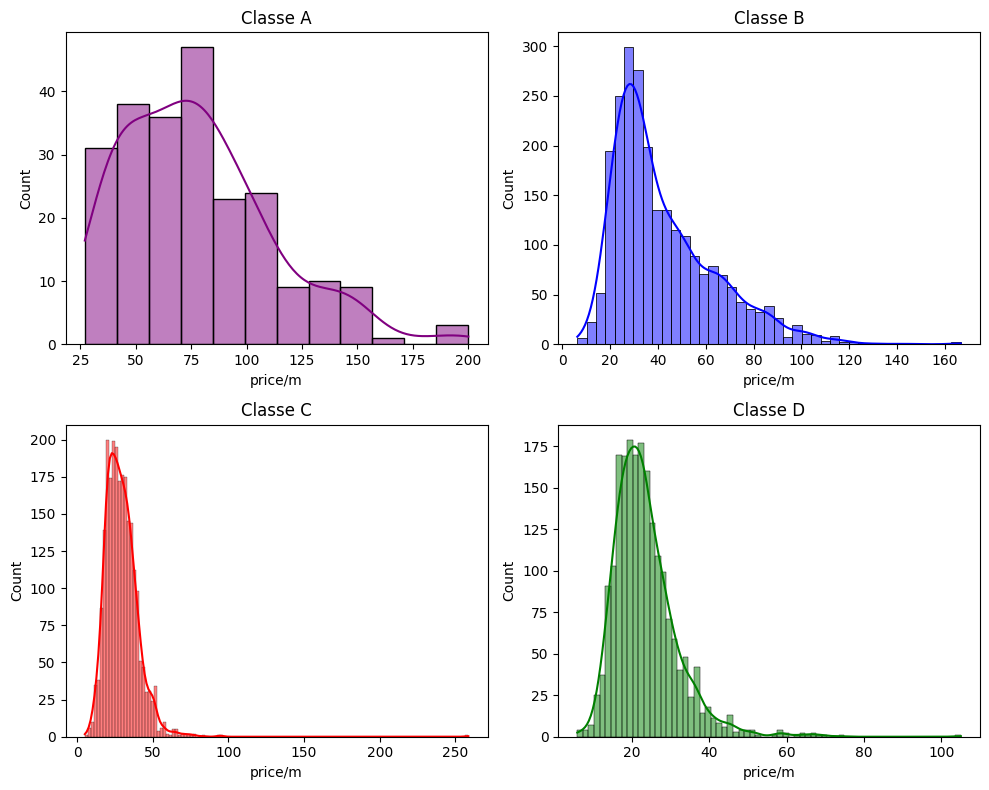

In [71]:
# Plotando histogramas para rent
hist_classes(df_rent)

Para o caso dos apartamentos listados como aluguel, temos que exceto pela primeira classe, que tem um número menor de observações, as outras classes apresentam um padrão de normalidade, o que sugere que essa categorização foi bem-sucedida.

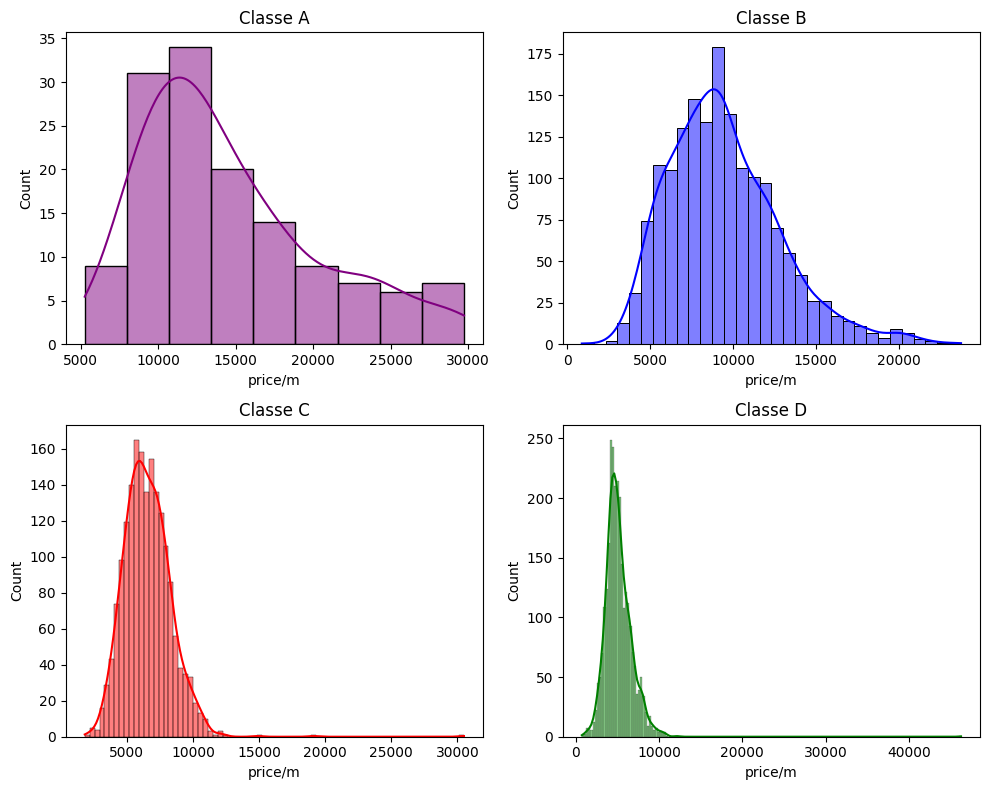

In [72]:
# Plotando histogramas para sale
hist_classes(df_sale)

Para o caso dos apartamentos disponiveis para venda, também temos um padrão de normalidade compravado visualmente pelos histogramas. Vale ressaltar que as classes possuem de fato uma certa assimetria, que se deve ao fato de que temos apartamentos com preços muito mais elevados de metro quadrado.

### **Conclusão**

A partir desta análise, temos um compreendimento mais profundo a respeitos das variáveis preditoras e suas influências na variavel resposta de Preço. Antes de prosseguirmos com a modelagem, algumas colunas criadas podem ser retiradas.

In [73]:
# Retirando colunas df_rent
df_rent = df_rent.drop(columns=["District", "Latitude", "Longitude", "price/m", "size_group", "central_dist", "mean_price/m", "std_price/m"])

df_rent

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,district_class
0,930,220.0,47,2,2,1,1,0,0,0,D
1,1000,148.0,45,2,2,1,1,0,0,0,D
2,1000,100.0,48,2,2,1,1,0,0,0,D
3,1000,200.0,48,2,2,1,1,0,0,0,D
4,1300,410.0,55,2,2,1,1,1,0,0,D
...,...,...,...,...,...,...,...,...,...,...,...
7014,3700,595.0,73,1,2,1,1,0,0,1,B
7015,21000,3000.0,208,4,4,3,3,1,1,1,B
7016,3800,710.0,55,1,1,0,1,0,1,1,B
7017,5000,2354.0,205,3,2,1,2,1,0,0,B


In [74]:
# Retirando colunas df_sale
df_sale = df_sale.drop(columns=["District", "Latitude", "Longitude", "price/m", "size_group", "central_dist", "mean_price/m", "std_price/m"])

df_sale

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,district_class
0,732600,1000.000000,74,1,2,1,2,1,0,1,B
1,1990000,2400.000000,164,4,5,2,3,1,1,1,B
2,720000,700.000000,70,2,2,1,1,1,0,1,B
3,1680000,1580.000000,155,3,5,3,2,1,0,1,B
4,1200000,900.000000,56,2,2,1,2,0,1,1,B
...,...,...,...,...,...,...,...,...,...,...,...
6297,265000,420.000000,51,2,1,0,1,0,0,0,C
6298,545000,630.000000,74,3,2,1,2,0,0,1,C
6299,515000,1100.000000,114,3,3,1,1,0,0,1,C
6300,345000,48.000000,39,1,2,1,1,0,1,1,C


Com isso, temos dois dataframes finais preparados para realizar a modelagem de predição, considerando as seguintes variaveis preditoras:

- `Condo`: Preço do Condominio (Quantitativa continua);
- `Size`: Tamanho do apartamento (Quantitativa continua);
- `Rooms`: Número de quartos (Quantitativa discreta);
- `Toilets`: Número de banheiros (Quantitativa discreta);
- `Suites`: Número de suítes (Quantitativa discreta);
- `Parking`: Número de vagas (Quantitativa discreta);
- `Elevator`: Indicador se o apartamento possui elevador (Qualitativa nominal - 0 para não e 1 para sim);
- `Furnished`: Indicador se o apartamento é mobiliado (Qualitativa nominal - 0 para não e 1 para sim);
- `Elevator`: Indicador se o apartamento possui pscina (Qualitativa nominal - 0 para não e 1 para sim);
- `district_class`: Grupo de classificação quanto a localização do apartamento (Qualitativa nominal - Classe A,Classe B ,Classe C e Classe D)

In [75]:
# Salvando como csv para modelagem 
df_rent.to_csv("../data/df_rent_final.csv")
df_sale.to_csv("../data/df_sale_final.csv")